# 필요한 패키지, 모듈 임포트

In [34]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import time

# 1. 문제1번
## 1.1 [문제1번 답안 작성을 위한 테스트코드] 
### 1.1.1 [문제1번 답안 작성을 위한 테스트코드] 오피넷 메인페이지 접속

In [35]:
driver = webdriver.Chrome()
driver.get('https://www.opinet.co.kr/user/main/mainView.do')

### 1.1.2 [문제1번 답안 작성을 위한 테스트코드] 오피넷 메인페이지에서 헤더의 "싼주유소 찾기"에 가서 지역별 버튼 누르기

In [36]:
cheap_gas = driver.find_element(By.XPATH, '//*[@id="header"]/div/ul/li[1]')
actions = ActionChains(driver)
actions.move_to_element(cheap_gas)

by_region_raw = cheap_gas.find_element(By.XPATH, '//*[@id="header"]/div/ul/li[1]/ul/li[1]/a')
actions.move_to_element(by_region_raw)
actions.click(by_region_raw)
actions.perform()

### 1.1.3 [문제1번 답안 작성을 위한 테스트코드]  오피넷 싼주유소 찾기에 들어왔다. 서울시를 선택하는 코드

In [37]:
sido_raw = driver.find_element(By.ID, 'SIDO_NM0')
sido = sido_raw.find_elements(By.TAG_NAME, 'option') 

In [38]:
sido_list = [i.get_attribute('value') for i in sido]
sido_list = sido_list[1:]
sido_list

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [39]:
actions = ActionChains(driver)
actions.move_to_element(sido_raw)
actions.click(sido_raw)
actions.send_keys(sido_list[0])
actions.perform()

### 1.1.4 [문제1번 답안 작성을 위한 테스트코드] 서울시의 구들을 선택하는 코드

In [40]:
wait = WebDriverWait(driver, 10)

gu_raw = wait.until(EC.element_to_be_clickable((By.ID, 'SIGUNGU_NM0')))
gu_list_raw = gu_raw.find_elements(By.TAG_NAME, 'option')
gu_list = [i.get_attribute('value') for i in gu_list_raw]
gu_list = gu_list[1:]
gu_list

['가평군',
 '고양시',
 '고양시덕양구',
 '고양시일산동구',
 '고양시일산서구',
 '과천시',
 '광명시',
 '광주시',
 '구리시',
 '군포시',
 '김포시',
 '남양주시',
 '동두천시',
 '부천시',
 '부천시소사구',
 '부천시오정구',
 '부천시원미구',
 '성남시',
 '성남시분당구',
 '성남시수정구',
 '성남시중원구',
 '수원시',
 '수원시권선구',
 '수원시영통구',
 '수원시장안구',
 '수원시팔달구',
 '시흥시',
 '안산시',
 '안산시단원구',
 '안산시상록구',
 '안성시',
 '안양시',
 '안양시동안구',
 '안양시만안구',
 '양주시',
 '양평군',
 '여주시',
 '연천군',
 '오산시',
 '용인시',
 '용인시기흥구',
 '용인시수지구',
 '용인시처인구',
 '의왕시',
 '의정부시',
 '이천시',
 '파주시',
 '평택시',
 '포천시',
 '하남시',
 '화성시']

In [41]:
actions.move_to_element(gu_raw)
actions.click(gu_raw)
actions.send_keys(gu_list[0]).perform()
        
# 페이지가 새로 로드되기를 기다립니다.
new_gu_raw = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.ID, 'SIGUNGU_NM0'))
        )

### 1.1.5 [문제1번 답안 작성을 위한 테스트코드]  조회버튼 누르기

In [42]:
# 조회 버튼 누르기
srch_raw = wait.until(EC.element_to_be_clickable((By.ID, 'searRgSelect')))
actions.move_to_element(srch_raw).click().perform()
# 새 페이지가 로드 될 때까지 기다립니다.
WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.ID, 'body1'))
        )

<selenium.webdriver.remote.webelement.WebElement (session="3200dcd2b3a5473720610cab02bf1759", element="FF5BA43FC3022F9A9C9B3E4FE0005FC5_element_244")>

### 1.1.6 [문제1번 답안 작성을 위한 테스트코드] 검색된 조건에 맞는 각 주유소들의 정보 가져오기 위해 각 주유소 버튼 누르기

In [43]:
station_raw = driver.find_element(By.ID, 'body1')
# 페이지로드 될때까지 기다립니다.
WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.TAG_NAME, 'a'))
        )
station_li_raw = station_raw.find_elements(By.TAG_NAME, 'a')

In [44]:
station_li_raw[1]

<selenium.webdriver.remote.webelement.WebElement (session="3200dcd2b3a5473720610cab02bf1759", element="FF5BA43FC3022F9A9C9B3E4FE0005FC5_element_247")>

In [45]:
station_element = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f'//*[@id="body1"]/tr[{1}]/td[1]/a'))
            )

actions.move_to_element(station_element).click().perform()

### 1.1.7 [문제1번 답안 작성을 위한 테스트코드]  BeautifulSoup으로 각 주유소의 정보 가져오기

In [46]:
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')

In [47]:
driver.quit()

### 1.1.8 [문제1번 답안 작성을 위한 테스트코드] 주유소명, 주소, 브랜드, 휘발유값, 경유값, 편의점, 24시간, 세차장, 셀프여부, 충전소 여부, 경정비여부의 정보를 추출하는 테스트코드

In [48]:
# 주유소명 추출
station_name = soup.select('#os_nm')[0].text
station_name

'(주)보성 세곡주유소'

In [49]:
# 주소 추출
addr = soup.select('#rd_addr')[0].text
addr

'서울 강남구  헌릉로 731 (세곡동)'

In [50]:
# 주유소 브랜드 추출
brands = soup.select('#poll_div_nm')[0].text
brands

'SK에너지'

In [51]:
# 휘발유 가격 추출하고 쉼표 없애기
gas_price = soup.select('#b027_p')[0].text.replace(',', '')
gas_price

'1559'

In [52]:
# 경유 가격 추출하고 쉼표 없애기
diesel_price = soup.select('#d047_p')[0].text.replace(',','')
diesel_price

'1469'

In [53]:
# 셀프주유소 여부 추출하기(셀프주유소가 아닌 주유소들에서는 self_icon ID가 아예 존재하지 않음으로 구분가능)
self_station = soup.select('#self_icon ')
self_station

[<img alt="셀프주유소" class="bul" id="self_icon" src="/images/user/gis/gis_icon_self.png"/>]

In [54]:
# 세차장 여부 출력하기(이미지 주소에 off가 있으면 세차장이 없는 곳임)
car_wash = soup.select('#cwsh_yn')[0]
car_wash

<img alt="세차장" id="cwsh_yn" src="/images/user/gis/oil_station_service1_01.gif"/>

In [55]:
# 충전소 여부 출력하기(이미지 주소에 off가 있으면 충전소가 없는 곳임)
recharge = soup.select('#lpg_yn')[0]
recharge

<img alt="충전소" id="lpg_yn" src="/images/user/gis/oil_station_service1_02_01_off.gif"/>

In [56]:
# 경정비 여부 출력하기(이미지 주소에 off가 있으면 경정비가 없는 곳임)
maintenance = soup.select('#maint_yn')[0]
maintenance

<img alt="경정비" id="maint_yn" src="/images/user/gis/oil_station_service1_03_off.gif"/>

In [57]:
# 편의점 여부 출력하기(이미지 주소에 off가 있으면 편의점이 없는 곳임)
cvs = soup.select('#cvs_yn')[0]
cvs

<img alt="편의점" id="cvs_yn" src="/images/user/gis/oil_station_service1_04_off.gif"/>

In [58]:
# 24시간 여부 출력하기(이미지 주소에 off가 있으면 24시간 영업 하지 않는 곳임)
twenty_four_hrs = soup.select('#sel24_yn')[0]
twenty_four_hrs

<img alt="24시영업" id="sel24_yn" src="/images/user/gis/oil_station_service1_05_off.gif"/>

### 이제 [문제1번 답안 작성을 위한 테스트코드]가 끝났고 실제 크롤링해오는 답안 작성 시작

## 1.2 [문제1번 풀이] 이제 서울시의 25개 구를 차례차례 클릭하고 정보 가져오고 데이터 정제하기

In [59]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import time

### 1.2.1 [문제1번 풀이] 오피넷 메인페이지에서 싼주유소 찾기 페이지 들어가서 서울시 체크박스 선택하는 코드

In [60]:
driver = webdriver.Chrome()
driver.get('https://www.opinet.co.kr/user/main/mainView.do')
time.sleep(2)

cheap_gas = driver.find_element(By.XPATH, '//*[@id="header"]/div/ul/li[1]')
actions = ActionChains(driver)
actions.move_to_element(cheap_gas)

by_region_raw = cheap_gas.find_element(By.XPATH, '//*[@id="header"]/div/ul/li[1]/ul/li[1]/a')
actions.move_to_element(by_region_raw)
actions.click(by_region_raw)
actions.perform()
time.sleep(2)

# 시도 리스트 정보 추출해오기
sido_raw = driver.find_element(By.ID, 'SIDO_NM0')
sido = sido_raw.find_elements(By.TAG_NAME, 'option')
sido_list = [i.get_attribute('value') for i in sido]
sido_list = sido_list[1:]

# 서울시 체크박스 클릭하기 
actions.move_to_element(sido_raw)
actions.click(sido_raw)
actions.send_keys(sido_list[0]).perform()

### 1.2.2 [문제1번 풀이] 서울시 내의 25개 구를 돌아가며 조건에 맞는 모든 주유소의 정보 추출해오는 코드 함수 정의 하기
#### 여기서 굳이 세차장, 24시간운영여부, 편의점, 경정비 체크박스를 체크할 필요가 없다
#### 왜냐하면 어차피 부가정보 체크박스들(세차, 24시, 편의점, 경정비) 체크박스 하나도 체크 안하면 그 지역의 모든 주유소 데이터가 출력되기 때문
#### 어차피 부가정보를 제공하느냐 안하느냐는 각 주유소의 하이퍼 링크 클릭했을 때의 HTML 코드의 각 부가정보가 들어있는 ID의 이미지주소에 'off'라는 문자가 들어있나 아닌가를 보고 판단할 수 있기 때문임

In [61]:
def get_gas_station_infos():
    station_infos = []
    for idx in tqdm(range(0, 25)):
        
        # 서울시의 구를 돌아가며 클릭하기
        actions = ActionChains(driver)
        wait = WebDriverWait(driver, 10)
        gu_raw = wait.until(EC.element_to_be_clickable((By.ID, 'SIGUNGU_NM0')))
        gu_list_raw = gu_raw.find_elements(By.TAG_NAME, 'option')   
        gu_list = [i.get_property('value') for i in gu_list_raw]
        gu_list = gu_list[1:]
        
        actions.move_to_element(gu_raw)
        actions.click(gu_raw)
        actions.send_keys(gu_list[idx]).perform()
        
        # 페이지가 새로 로드되기를 기다립니다.
        new_gu_raw = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.ID, 'SIGUNGU_NM0'))
        )

        
        # 조회 버튼 누르기
        srch_raw = wait.until(EC.element_to_be_clickable((By.ID, 'searRgSelect')))
        actions.move_to_element(srch_raw).click().perform()
        
        # 페이지 로드되기를 기다립니다
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.ID, 'body1'))
        )

        # 조건에 맞게 검색된 주유소 버튼을 하나씩 누르기
        station_raw = driver.find_element(By.ID, 'body1')
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.TAG_NAME, 'a'))
        )
        station_li_raw = station_raw.find_elements(By.TAG_NAME, 'a')
        
        time.sleep(2)
        # 조건에 맞게 검색된 주유소 버튼을 하나씩 누르기
        for idx in range(len(station_li_raw)):
            # 클릭 가능할 때까지 기다립니다.
            station_element = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, f'//*[@id="body1"]/tr[{idx + 1}]/td[1]/a'))
            )

            actions.move_to_element(station_element).click().perform()
            
            req = driver.page_source
            soup = BeautifulSoup(req, 'html.parser')
            tmp = soup.select('#os_dtail_info')
            station_infos.extend(tmp)

    return station_infos

In [62]:
try:
    stations_infos = get_gas_station_infos()
finally:
    driver.quit()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [04:16<00:00, 10.26s/it]


In [63]:
len(stations_infos)

436

In [65]:
stations_infos[0]

<div class="gis_detail_info_box" id="os_dtail_info"> <div class="inner"> <div class="header"> <img alt="sk에너지" class="mgr_5" id="os_title_icon" src="/images/user/com/icon_sk.gif"/><label id="os_nm">(주)보성 세곡주유소</label> <span id="SPAN_SELF_VLT_YN_ID"><img alt="셀프주유소" class="bul" id="self_icon" src="/images/user/gis/gis_icon_self.png"/></span> </div> <div class="overflow_gis_detail" style="height:455px;"> <div class="gis_detail_info_bcon"> <div class="desc_box mgb_0"> <div class="d_left"><span class="gis_dpopup_tt">기본정보　<span id="SPAN_KPETRO"></span></span></div> <div class="d_right"> <!--a class="btn_type2_gray va_top" href="#" title="주유소사진보기"><span>주유소사진보기</span></a--> 					<a class="btn_type2_green va_top" href="javascript:fnInsertMycareos('A0001219','1208549361');" title="관심주유소 등록"><span>관심주유소 등록</span></a> </div> </div> <ul> <li>- 전화번호 : <label id="phn_no">02-445-6870</label></li> <li>- 주소 : <label id="rd_addr">서울 강남구  헌릉로 731 (세곡동)</label></li> <li>- 상표 : <label id="poll_div_nm">SK에

### 1.2.3 [문제1번 풀이] 보성 세곡주유소를 대상으로 각 칼럼에 들어갈 정보 추출하는 코드 테스트 하고 함수로 만들기

In [66]:
# 주유소 이름 추출하기
stations_infos[0].select('#os_nm')[0].text

'(주)보성 세곡주유소'

In [67]:
## 주유소 주소 추출하기
stations_infos[0].select('#rd_addr')[0].text

'서울 강남구  헌릉로 731 (세곡동)'

In [68]:
# 주유소 브랜드 추출하기
stations_infos[0].select('#poll_div_nm')[0].text

'SK에너지'

In [69]:
# 휘발유 가격 추출하기
stations_infos[0].select('#b027_p')[0].text

'1,559'

In [70]:
# 경유 가격 추출하기
stations_infos[0].select('#d047_p')[0].text

'1,469'

In [71]:
# 셀프 여부 추출하기
tmp = stations_infos[0].select('#self_icon')[0].get('src')
if 'off' in tmp:
    res = 'N'
else:
    res = 'Y'
res

'Y'

In [72]:
# 충전소 여부 출력하기
tmp = stations_infos[0].select('#lpg_yn')[0].get('src')
if 'off' in tmp:
    res = 'N'
else:
    res = 'Y'
res

'N'

In [73]:
# 세차장 여부 추출하기
tmp = stations_infos[0].select('#cwsh_yn')[0].get('src')
if 'off' in tmp:
    res = 'N'
else:
    res = 'Y'
res

'Y'

In [74]:
# 경정비 여부 출력하기
tmp = stations_infos[0].select('#maint_yn')[0].get('src')
if 'off' in tmp:
    res = 'N'
else:
    res = 'Y'
res

'N'

In [75]:
# 편의점 여부 출력하기
tmp = stations_infos[0].select('#cvs_yn')[0].get('src')
if 'off' in tmp:
    res = 'N'
else:
    res = 'Y'
res

'N'

In [76]:
# 24시간 영업여부 출력하기
tmp = stations_infos[0].select('#sel24_yn')[0].get('src')
if 'off' in tmp:
    res = 'N'
else:
    res = 'Y'
res

'N'

### 1.2.4 [문제1번 풀이] 셀프주유소 여부 구하는 함수
### 셀프여부는 주유소 상세페이지 헤더의 아이콘으로 표시되는데 셀프 여부를 표시하는 아이콘이 없으면
### (HTML의 셀프여부 아이콘이 들어있는 ID로 추출해낸 정보)가 없으면 셀프주유소가 아니다.

In [77]:
def self_is(data, selector, index):
    try:
        element = data[index].select(selector)
        if not element:
            return 'N'
        else:
            return 'Y'
    except:
        print(f'에러가 발생하였습니다. index.no: {index}')

### 1.2.5 부가정보들(24시간,세차장,편의점,경정비,충전소 여부) 구하는 함수

In [78]:
def additional_infos(data, selector, index):
    try:
        # 인덱스를 사용하여 정보 추출
        info_element = data[index].select(selector)
        if not info_element:
            return '정보 없음' # 선택된 요소가 없다면 '정보 없음' 반환
        info_src = info_element[0].get('src')
        # 이미지 파일명에 'off'가 포함되어 있으면 'N', 그렇지 않으면 'Y'
        return 'N' if 'off' in info_src else 'Y'
    except:
        print(f'에러가 발생하였습니다. INDEX.NO: {index}')

### 1.2.6 [문제1번 풀이] for문을 활용하여 부가정보 및 데이터프레임의 각 칼럼에 들어갈 정보 추출하는 함수

In [79]:
def extract_infos(data):
    station_name = []; station_addr = []; station_brand = []
    gasoline_price = []; diesel_price = []
    
    # 추가 정보를 위한 리스트 생성
    self_yn = []; maint_yn = []; cvs_yn = []
    twenty_four_yn = []; lpg_yn = []; carwash_yn = []

    for i in tqdm(range(len(data))):
        
        # 주유소 이름 추출하기
        tmp_name = data[i].select('#os_nm')[0].text.strip()
        station_name.append(tmp_name)
        
        # 주유소 주소 추출하기
        tmp_addr = data[i].select('#rd_addr')[0].text.strip()
        station_addr.append(tmp_addr)
        
        # 주유소 브랜드 추출하기
        tmp_brands = data[i].select('#poll_div_nm')[0].text.strip()
        station_brand.append(tmp_brands)
        
        # 휘발유 가격 추출하기(단위 구분 쉼표는 없애주기)
        tmp_gas_price = data[i].select('#b027_p')[0].text.replace(',','').strip()
        gasoline_price.append(tmp_gas_price)
        
        # 경유 가격 추출하기(단위 구분 쉼표는 없애주기)
        tmp_diesel_price = data[i].select('#d047_p')[0].text.replace(',','').strip()
        diesel_price.append(tmp_diesel_price)
        
        # 추가 정보 추출
        self_yn.append(self_is(data, '#self_icon', i))
        maint_yn.append(additional_infos(data, '#maint_yn', i))
        cvs_yn.append(additional_infos(data, '#cvs_yn', i))
        twenty_four_yn.append(additional_infos(data, '#sel24_yn', i))
        lpg_yn.append(additional_infos(data, '#lpg_yn', i))
        carwash_yn.append(additional_infos(data, '#cwsh_yn', i))
        
    # 결과를 딕셔너리로 반환
    return {
        'station_name': station_name,
        'station_addr': station_addr,
        'station_brand': station_brand,
        'gasoline_price': gasoline_price,
        'diesel_price': diesel_price,
        'self_yn': self_yn,
        'maint_yn': maint_yn,
        'cvs_yn': cvs_yn,
        'twenty_four_yn': twenty_four_yn,
        'lpg_yn': lpg_yn,
        'carwash_yn': carwash_yn
    }

In [80]:
result = extract_infos(stations_infos)

100%|███████████████████████████████████████████████████████████████████████████████| 436/436 [00:01<00:00, 226.14it/s]


### 1.2.6 [문제1번 풀이] 각 주유소들이 속한 구 이름 추출하고 result 딕셔너리에 넣어주기
### (근데 result 딕셔너리의 주소리스트 보니까 다 띄어쓰기 기준 두번째에 구이름이 위치하고있음)

In [81]:
gu_names = []
for i in range(len(result['station_addr'])):
    addr_tmps = result['station_addr']
    tmp = addr_tmps[i].split()[1]
    gu_names.append(tmp)
print(len(gu_names), gu_names)
result['gu_names'] = gu_names

436 ['강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강동구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '구로구', '금천구', '금천구', '금천구', '금천구', '금천구', '

### 1.2.7 [문제1번 풀이] 추출된 결과를 바탕으로 각 주유소의 위도 경도 정보 얻는 함수 정의하기

In [82]:
import googlemaps

In [83]:
# api_key = ''''
# gmaps = googlemaps.Client(api_key)

In [84]:
def get_latlng(data):
    tmp_lat = []
    tmp_lng = []
    incompletes = []
    for idx in tqdm(range(len(data))):
        addrs = gmaps.geocode(data[idx])
        try:
            lat = addrs[0]['geometry']['location']['lat'] 
            lng = addrs[0]['geometry']['location']['lng']
            tmp_lat.append(lat)
            tmp_lng.append(lng)
        except:
            print(f'오류가 발생하였습니다. 인덱스번호: {idx}')
            incompletes.append(idx)
    return tmp_lat, tmp_lng

In [85]:
lat_lng_tuple = get_latlng(result['station_addr'])

100%|████████████████████████████████████████████████████████████████████████████████| 436/436 [00:52<00:00,  8.23it/s]


In [86]:
lat_list = lat_lng_tuple[0]
lng_list = lat_lng_tuple[1]
# 아까 각 주유소들의 위도, 경도 정보 빼고 모든 정보 들어있는 result 딕셔너리에 lat, lng 넣어주기
result['lat'] = lat_list
result['lng'] = lng_list

## 1.3 [문제1번 풀이] 서울시의 각 구의 주유소들의 정보를 담은 데이터프레임 만들기

In [87]:
gas_stations_df = pd.DataFrame(result)

In [88]:
gas_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   station_name    436 non-null    object 
 1   station_addr    436 non-null    object 
 2   station_brand   436 non-null    object 
 3   gasoline_price  436 non-null    object 
 4   diesel_price    436 non-null    object 
 5   self_yn         436 non-null    object 
 6   maint_yn        436 non-null    object 
 7   cvs_yn          436 non-null    object 
 8   twenty_four_yn  436 non-null    object 
 9   lpg_yn          436 non-null    object 
 10  carwash_yn      436 non-null    object 
 11  gu_names        436 non-null    object 
 12  lat             436 non-null    float64
 13  lng             436 non-null    float64
dtypes: float64(2), object(12)
memory usage: 47.8+ KB


### 1.3.1 [문제1번 풀이] 휘발유, 경유 칼럼 숫자형으로 형변환하기

In [89]:
gas_stations_df[['gasoline_price','diesel_price']] = gas_stations_df[['gasoline_price','diesel_price']].astype('float')
gas_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   station_name    436 non-null    object 
 1   station_addr    436 non-null    object 
 2   station_brand   436 non-null    object 
 3   gasoline_price  436 non-null    float64
 4   diesel_price    436 non-null    float64
 5   self_yn         436 non-null    object 
 6   maint_yn        436 non-null    object 
 7   cvs_yn          436 non-null    object 
 8   twenty_four_yn  436 non-null    object 
 9   lpg_yn          436 non-null    object 
 10  carwash_yn      436 non-null    object 
 11  gu_names        436 non-null    object 
 12  lat             436 non-null    float64
 13  lng             436 non-null    float64
dtypes: float64(4), object(10)
memory usage: 47.8+ KB


### 1.3.2 [문제1번 풀이] describe() 메서드를 통해 대략적인 분포를 살펴보기

In [90]:
gas_stations_df.describe(include = 'object')

,station_name,station_addr,station_brand,self_yn,maint_yn,cvs_yn,twenty_four_yn,lpg_yn,carwash_yn,gu_names
count,436,436,436,436,436,436,436,436,436,436
unique,431,436,7,2,2,2,2,2,2,25
top,대원주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,Y,N,N,N,N,Y,강서구
freq,2,1,126,270,335,400,323,428,330,33


### 1.3.3 [문제1번 풀이] station_name(주유소이름) 칼럼의 고유값이 438이 아니라서 value_counts() 해봄
#### 해보니까 동일한 주유소 이름(주소는 다른듯)이 5곳 있음
#### 실제로 loc을 통해 살펴보니 주소는 다달랐음 (이름만 같은 곳들)
#### 하지만 셀프여부에 따른 가격차이가 나느냐를 판단하는데는 문제가 없으므로 그냥 놔둠

In [91]:
tmp_counts = gas_stations_df['station_name'].value_counts()
gas_stations_df['station_name'].value_counts()

station_name
대원주유소                    2
동일주유소                    2
대성주유소                    2
현대주유소                    2
신성주유소                    2
                        ..
현대오일뱅크㈜직영 금천제일주유소        1
남서울경복에너지                 1
백산주유소                    1
HD현대오일뱅크㈜직영 금천현대셀프주유소    1
신일셀프주유소                  1
Name: count, Length: 431, dtype: int64

In [92]:
tmp = tmp_counts.index[:5]

In [93]:
gas_stations_df.loc[gas_stations_df['station_name'].isin(tmp),:]

,station_name,station_addr,station_brand,gasoline_price,diesel_price,self_yn,maint_yn,cvs_yn,twenty_four_yn,lpg_yn,carwash_yn,gu_names,lat,lng
85,대성주유소,서울 강서구 강서로 472,GS칼텍스,1618.0,1558.0,N,Y,N,N,N,Y,강서구,37.567503,126.841419
100,현대주유소,서울 관악구 난곡로 108 (신림동),HD현대오일뱅크,1596.0,1496.0,N,N,N,N,N,N,관악구,37.464982,126.919674
110,대원주유소,서울 광진구 용마산로 122 (중곡동),S-OIL,1528.0,1442.0,N,N,N,N,N,N,광진구,37.564548,127.086996
124,신성주유소,서울 구로구 구로동로 187 (구로제2동),HD현대오일뱅크,1515.0,1425.0,Y,N,N,N,N,Y,구로구,37.495159,126.882389
160,신성주유소,서울 노원구 월계로 328 (월계동),S-OIL,1598.0,1498.0,Y,N,N,Y,N,Y,노원구,37.628779,127.057335
275,동일주유소,서울 성동구 광나루로 254 (성수동2가),HD현대오일뱅크,1919.0,1819.0,N,N,N,N,N,Y,성동구,37.548454,127.057847
296,동일주유소,서울특별시 성북구 보문로 85 (보문동5가),S-OIL,1569.0,1529.0,Y,N,N,Y,N,Y,성북구,37.582704,127.019192
312,대성주유소,서울 송파구 마천로 230 (마천동),SK에너지,1578.0,1498.0,N,N,N,N,N,Y,송파구,37.500054,127.143147
331,현대주유소,서울 양천구 남부순환로 372 (신월동),S-OIL,1494.0,1419.0,Y,N,N,N,N,Y,양천구,37.533873,126.829262
426,대원주유소,서울 중랑구 동일로 600,GS칼텍스,1497.0,1407.0,Y,N,N,N,N,Y,중랑구,37.584033,127.080108


# 1번문제 답:

In [94]:
gas_stations_df

,station_name,station_addr,station_brand,gasoline_price,diesel_price,self_yn,maint_yn,cvs_yn,twenty_four_yn,lpg_yn,carwash_yn,gu_names,lat,lng
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1559.0,1469.0,Y,N,N,N,N,Y,강남구,37.467157,127.118708
1,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,1569.0,1489.0,Y,N,N,N,N,Y,강남구,37.466567,127.119080
2,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,1573.0,1535.0,Y,N,N,N,N,Y,강남구,37.509858,127.065110
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,1597.0,1519.0,Y,N,N,N,N,Y,강남구,37.474993,127.106887
4,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,1598.0,1559.0,Y,N,N,N,N,Y,강남구,37.483400,127.104046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),S-OIL,1549.0,1469.0,N,N,N,N,N,N,중랑구,37.617628,127.094381
432,신내주유소,서울 중랑구 용마산로 705 (신내동),SK에너지,1563.0,1482.0,Y,N,N,N,N,Y,중랑구,37.617125,127.095896
433,용마로주유소,서울 중랑구 용마산로 309 (면목동),SK에너지,1588.0,1488.0,Y,N,N,N,N,Y,중랑구,37.579878,127.092182
434,범아주유소,서울 중랑구 동일로 881 (묵동),S-OIL,1588.0,1498.0,N,Y,N,N,N,Y,중랑구,37.609311,127.077673


In [95]:
gas_stations_df.to_csv('../datas/유가정보분석하기.csv', encoding = 'cp949')

# 문제 2번

## 2.1 셀프여부에 따른 휘발유 가격 차이를 검정

In [96]:
gas_stations_df = pd.read_csv('../datas/유가정보분석하기.csv', encoding = 'cp949')

### 2.1.1 먼저 셀프인 그룹과 셀프가 아닌 그룹을 나누고 QQ-Plot과 kdeplot 그려보자(휘발유)

#### line = 's'와 fit = True 파라미터는 현재 그룹에 이론상 적합한 정규분포를 보여주는 선을 그려주는 파라미터이다
#### qq-plot의 모양을 보면 두 집단(셀프,일반) 모두 right-skewed 임이 보인다
#### kdeplot 보면 두 집단 모두 right-skewed 됨이 더 확연히 보임
#### right-skew는 분포의 오른쪽 꼬리가 왼쪽 꼬리보다 긴 형태이므로 중앙값보다 평균이 더 큰 분포임

C:\Users\kd010\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kd010\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


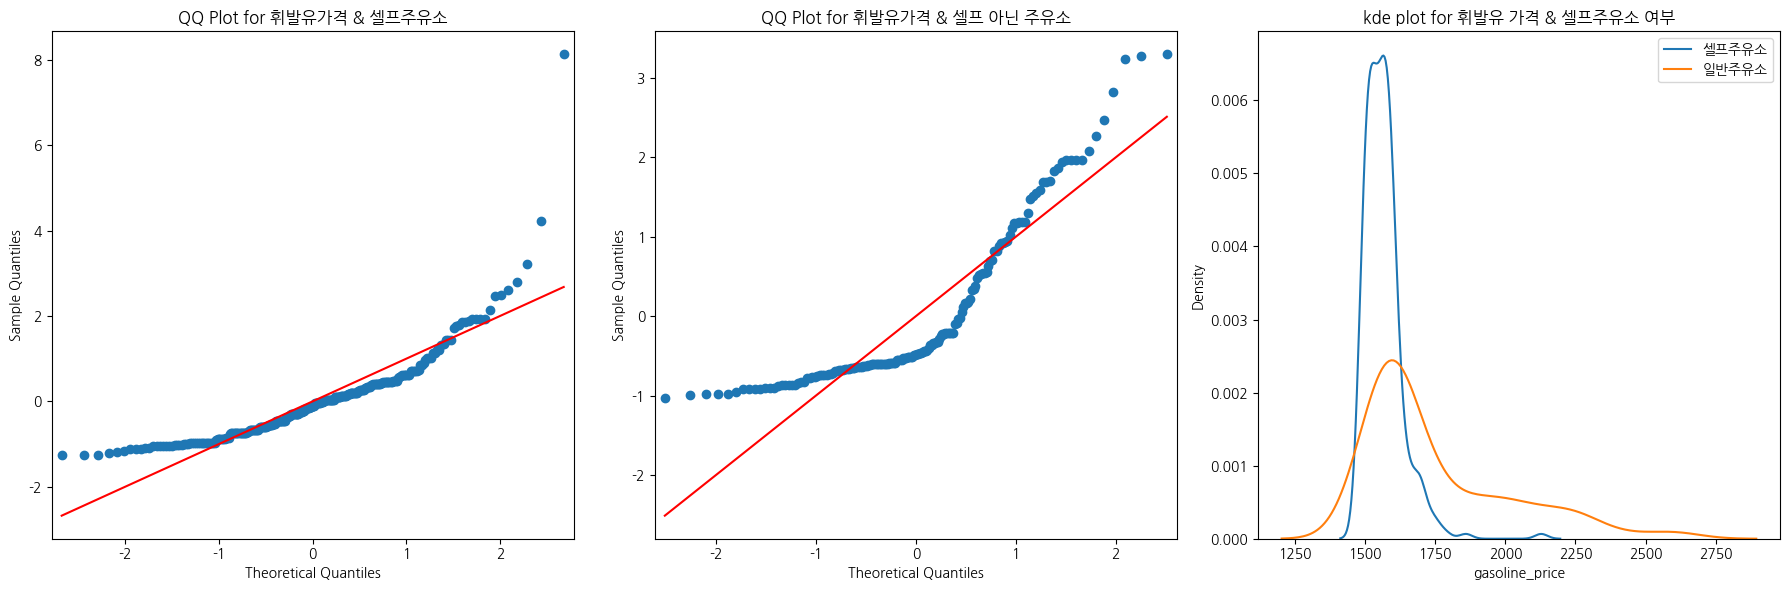

In [98]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

self_prices_gasoline = gas_stations_df[gas_stations_df['self_yn'] == 'Y']['gasoline_price']
non_self_prices_gasoline = gas_stations_df[gas_stations_df['self_yn'] == 'N']['gasoline_price']

# 서브플롯 설정
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1행에 3개의 서브플롯

# 첫 번째 서브플롯: 셀프 주유소의 휘발유 가격에 대한 QQ Plot
sm.qqplot(self_prices_gasoline, line='s', fit=True, ax=axs[0])
axs[0].set_title('QQ Plot for 휘발유가격 & 셀프주유소')

# 두 번째 서브플롯: 일반 주유소의 휘발유 가격에 대한 QQ Plot
sm.qqplot(non_self_prices_gasoline, line='s', fit=True, ax=axs[1])
axs[1].set_title('QQ Plot for 휘발유가격 & 셀프 아닌 주유소')

# 세 번째 서브플롯: KDE Plot
sns.kdeplot(self_prices_gasoline, ax=axs[2], label='셀프주유소')
sns.kdeplot(non_self_prices_gasoline, ax=axs[2], label='일반주유소')
axs[2].set_title('kde plot for 휘발유 가격 & 셀프주유소 여부')
axs[2].legend()

# 전체 그래프의 레이아웃을 조정하고 표시
plt.tight_layout()
plt.show()

### 실제로 바로 밑 셀(피봇테이블)보면 gasoline_price(휘발유) 가격에 대해 셀프주유소와 셀프 아닌 주유소 모두에게서 평균이 중앙값보다 크다
### 즉, right-skewed(오른쪽 꼬리가 긴) 분포임

In [99]:
gas_stations_df.pivot_table(index = ['self_yn'], values = ['gasoline_price'], aggfunc = ['mean','median'])

,mean,median
,gasoline_price,gasoline_price
self_yn,,
N,1753.409639,1627.5
Y,1566.166667,1559.0


### 2.1.2 보통 정규성 검정에 많이 쓰이는 샤피로 검정 수행하기
#### 휘발유 가격에 대해 셀프주유소 그룹, 일반 주유소 그룹 모두
#### p-value가 0.05 보다 작아서 정규분포를 따른다고 보기 힘들다는 결과가 나옴
#### 따라서 비모수적 방법인 Mann-Whitney 검정으로 휘발유가격에 대한 셀프 주유소가 일반 주유소보다 저렴하다는 가설을 검증해볼 것임

In [100]:
import scipy.stats as stats

# 셀프 서비스 휘발유 가격에 대한 샤피로-윌크 검정
w_stat_self, p_value_self = stats.shapiro(self_prices_gasoline)
print(f"셀프 서비스 휘발유 가격 - W-Statistic={w_stat_self}, P-Value={p_value_self:.20f}")

# 일반 서비스 휘발유 가격에 대한 샤피로-윌크 검정
w_stat_non_self, p_value_non_self = stats.shapiro(non_self_prices_gasoline)
print(f"일반 서비스 휘발유 가격 - W-Statistic={w_stat_non_self}, P-Value={p_value_non_self:.20f}")

# 유의 수준을 정의
alpha = 0.05

# 셀프 주유소 휘발유 가격의 검정 결과 해석
if p_value_self > alpha:
    print('셀프 주유소 휘발유 가격은 정규 분포를 따른다고 볼 수 있습니다 (귀무 가설 기각 실패).')
else:
    print('셀프 주유소 휘발유 가격은 정규 분포를 따르지 않는다고 볼 수 있습니다 (귀무 가설 기각).')

# 일반 주유소 가격의 검정 결과 해석
if p_value_non_self > alpha:
    print('일반 주유소 휘발유 가격은 정규 분포를 따른다고 볼 수 있습니다 (귀무 가설 기각 실패).')
else:
    print('일반 주유소 휘발유 가격은 정규 분포를 따르지 않는다고 볼 수 있습니다 (귀무 가설 기각).')

셀프 서비스 휘발유 가격 - W-Statistic=0.8069818019866943, P-Value=0.00000000000000001315
일반 서비스 휘발유 가격 - W-Statistic=0.810258150100708, P-Value=0.00000000000020662874
셀프 주유소 휘발유 가격은 정규 분포를 따르지 않는다고 볼 수 있습니다 (귀무 가설 기각).
일반 주유소 휘발유 가격은 정규 분포를 따르지 않는다고 볼 수 있습니다 (귀무 가설 기각).


### 2.1.3 비모수적 방법인 Mann-Whitney 검정을 통해 휘발유 가격에 대한 두 집단(셀프, 일반)에 대한 검정 수행하기
#### scipy.stats 모듈의 mannwithneyu의 alternative 파라미터는 'two-sided'면 양측검정을 수행하며
#### 'greater'이면 data1이 data2보다 높은 값을 가지는지 검정하며
#### 'less'이면 data1이 data2보다 낮은 값을 가지는지 검정한다
#### data1를 셀프주유소, data2를 일반주유소 그룹으로 설정하고 alternative = 'less'로 셀프 주유소의 휘발유가격이 일반 주유소보다 저렴한지 검정하자
#### 밑 셀의 출력결과에서 볼수 있듯이 휘발유 가격에 대해 self, non-self 두 그룹의 유의한 통계적 차이가 있으며 self 그룹이 더 저렴하다고 볼 수 있다

In [101]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U 검정 수행
u_statistic, p_value = mannwhitneyu(self_prices_gasoline, non_self_prices_gasoline, alternative = 'less')

# 결과 출력
print('U 통계량:', u_statistic)
print('p-value:', p_value)

# 결론
if p_value < 0.05:
    print("두 집단 간의 가격 차이가 통계적으로 유의하므로 셀프 주유소는 일반 주유소보다 휘발유 가격이 저렴하다고 볼 수 있다.")
else:
    print("두 집단 간의 가격 차이가 통계적으로 유의하지 않다.")

U 통계량: 9792.0
p-value: 2.6050557531132032e-23
두 집단 간의 가격 차이가 통계적으로 유의하므로 셀프 주유소는 일반 주유소보다 휘발유 가격이 저렴하다고 볼 수 있다.


### 2.1.4 자치구별 셀프여부와 브랜드에 따른 휘발유 가격 박스플롯 그리기
#### 밑의 두 박스플롯을 보면 주황색(셀프주유소의 휘발유가격들)이 파란색(일반주유소 휘발유가격)보다 대체로 낮은 가격대에 분포함이 보인다

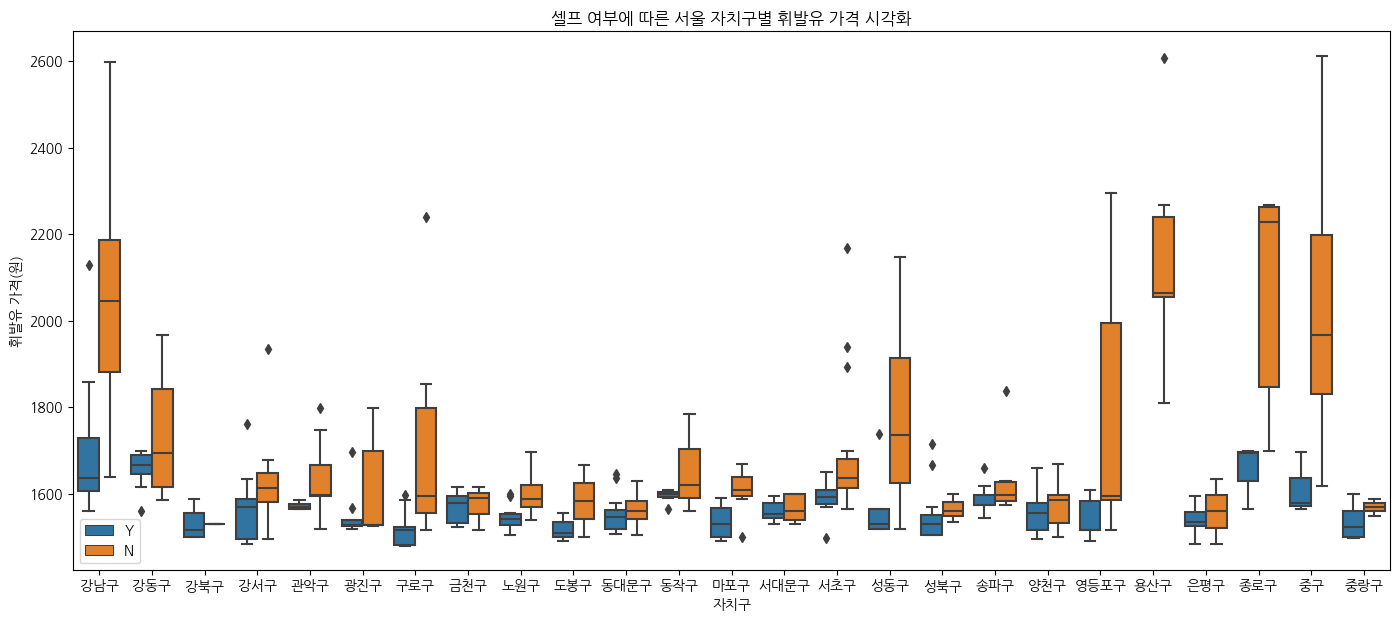

In [102]:
from scipy.stats import levene, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# 셀프 여부에 따른 휘발유 가격 시각화
plt.figure(figsize = (17,7))
sns.boxplot(x='gu_names', y='gasoline_price', data = gas_stations_df, hue = 'self_yn')
plt.title('셀프 여부에 따른 서울 자치구별 휘발유 가격 시각화')
plt.xlabel('자치구')
plt.ylabel('휘발유 가격(원)')
plt.legend()
plt.show()

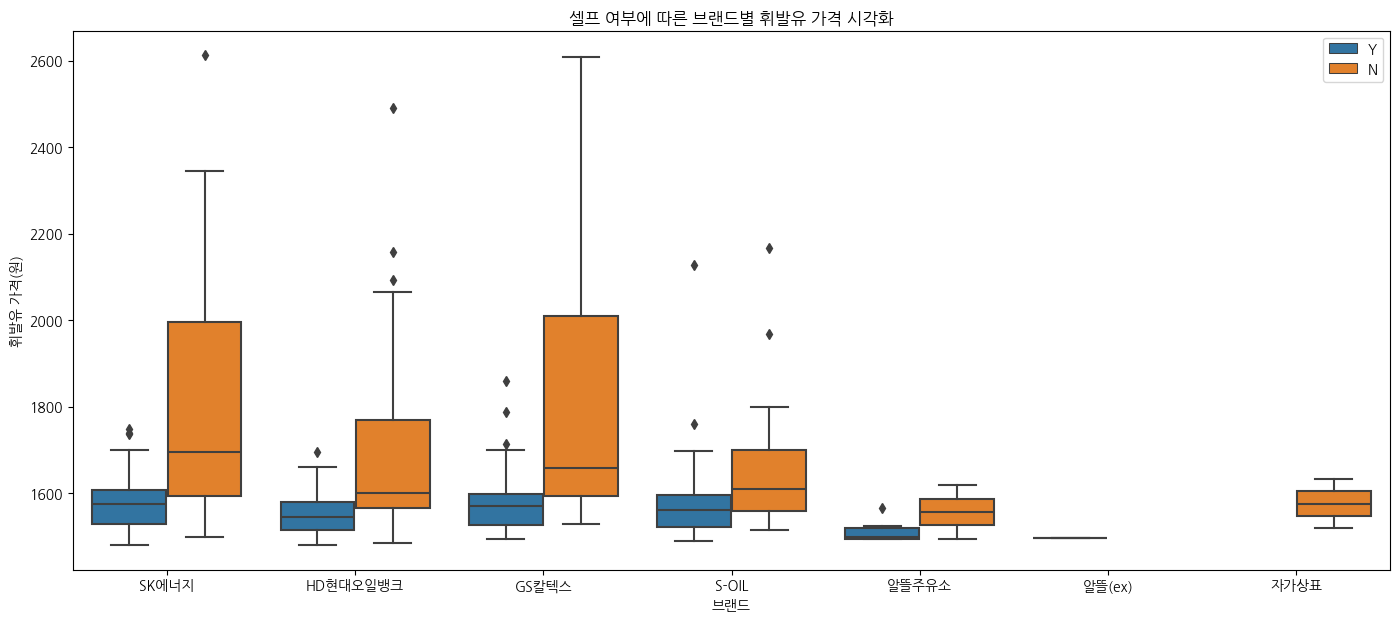

In [103]:
plt.figure(figsize = (17,7))
sns.boxplot(x='station_brand', y='gasoline_price', data = gas_stations_df, hue = 'self_yn')
plt.title('셀프 여부에 따른 브랜드별 휘발유 가격 시각화')
plt.xlabel('브랜드')
plt.ylabel('휘발유 가격(원)')
plt.legend()
plt.show()

### 2.1.5 folium을 사용하여 셀프 여부에 따라 휘발유 가격 시각화 해보기
#### 초록색 원과 아이콘은 셀프주유소 빨간색 원과 아이콘은 셀프 아닌 곳들
#### Circle Marker의 radius 값에 휘발유 가격을 곱하여서 원의 크기가 가격을 표시할 수 있도록 시각화 하였다
#### 지도를 확대해서 보면 대체로 초록색(셀프주유소)들이 빨간색(셀프 아닌 주유소들)보다 원의 크기가 작음이 보인다

In [104]:
import folium
#서울 중심부의 위치
map_center = [37.5665, 126.9780]

# 지도 객체 생성
m_gasoline = folium.Map(location=map_center, zoom_start=11)

# 데이터프레임을 반복하면서 마커와 팝업을 추가
for idx, row in gas_stations_df.iterrows():
    # 셀프 여부에 따라 색상을 다르게 설정
    if row['self_yn'] == 'Y':
        icon_color = 'green'
    else:
        icon_color = 'red'
    
    # 마커 생성
    marker = folium.Marker(
        location= [row['lat'], row['lng']],
        popup = '{}원'.format(row['gasoline_price']),
        icon = folium.Icon(color=icon_color),
        tooltip = row['station_name']
    )
    circle_marker = folium.Circle(
        location= [row['lat'], row['lng']],
        radius = row['gasoline_price'] * 0.3,
        fill_color = 'green' if row['self_yn'] == 'Y' else 'red',
        line_color = 'green' if row['self_yn'] == 'Y' else 'red',
        tooltip = '{}원'.format(row['gasoline_price']))
        
    # 생성된 마커를 지도에 추가
    marker.add_to(m_gasoline)
    circle_marker.add_to(m_gasoline)

In [105]:
m_gasoline

## 2.2 셀프 여부에 따른 경유가격의 차이 분석하기

### 2.2.1 먼저 셀프인 그룹과 셀프가 아닌 그룹을 나누고 QQ-Plot과 kdeplot 그려보자(경유)
#### line = 's'와 fit = True 파라미터는 현재 그룹에 이론상 적합한 정규분포를 보여주는 선을 그려주는 파라미터이다
#### qq-plot의 모양을 보면 두 집단(셀프,일반) 모두 right-skewed 임이 보인다
#### kdeplot 보면 두 집단 모두 right-skewed 됨이 더 확연히 보임
#### right-skew는 분포의 오른쪽 꼬리가 왼쪽 꼬리보다 긴 형태이므로 중앙값보다 평균이 더 큰 분포임

C:\Users\kd010\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kd010\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


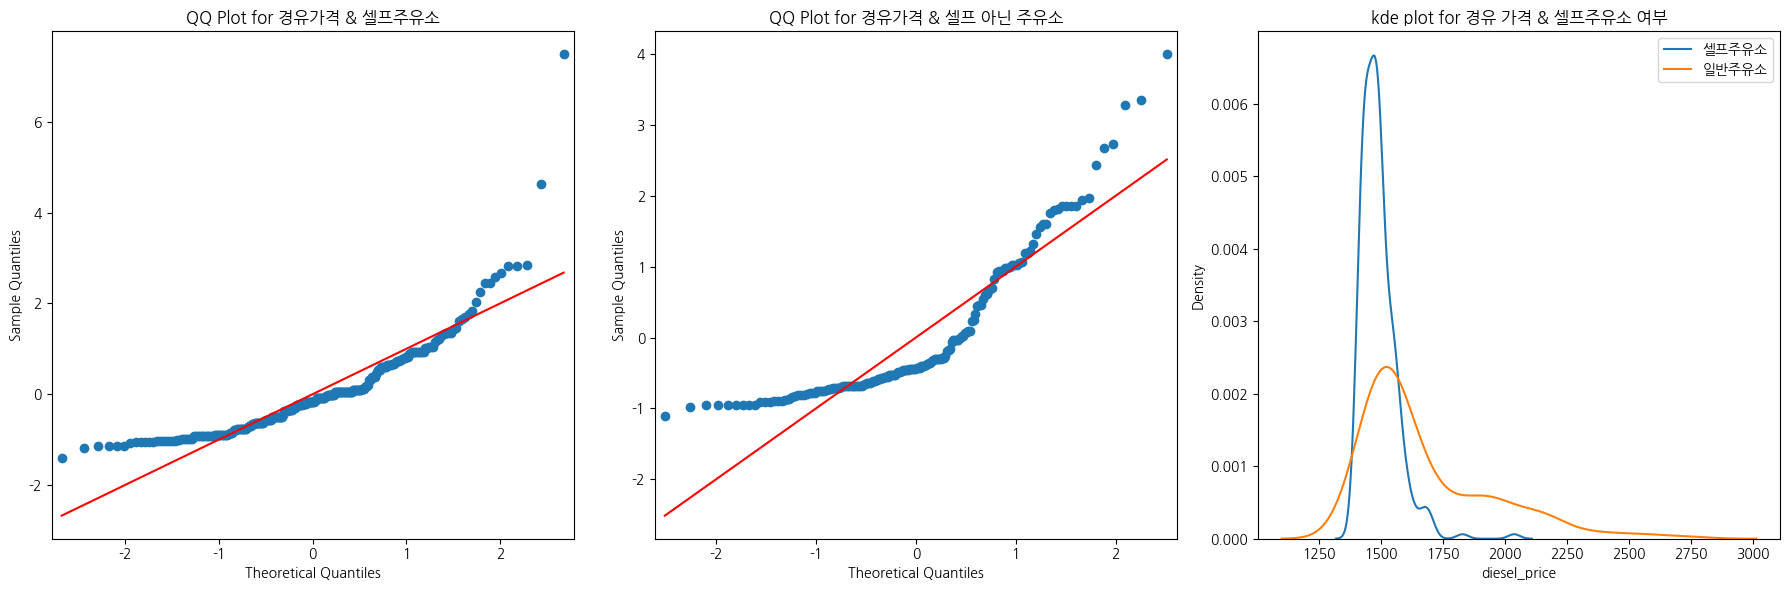

In [107]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

self_prices_diesel = gas_stations_df[gas_stations_df['self_yn'] == 'Y']['diesel_price']
non_self_prices_diesel = gas_stations_df[gas_stations_df['self_yn'] == 'N']['diesel_price']

# 서브플롯 설정
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1행에 3개의 서브플롯

# 첫 번째 서브플롯: 셀프 주유소의 경유 가격에 대한 QQ Plot
sm.qqplot(self_prices_diesel, line='s', fit=True, ax=axs[0])
axs[0].set_title('QQ Plot for 경유가격 & 셀프주유소')

# 두 번째 서브플롯: 일반 주유소의 경유 가격에 대한 QQ Plot
sm.qqplot(non_self_prices_diesel, line='s', fit=True, ax=axs[1])
axs[1].set_title('QQ Plot for 경유가격 & 셀프 아닌 주유소')

# 세 번째 서브플롯: KDE Plot
sns.kdeplot(self_prices_diesel, ax=axs[2], label='셀프주유소')
sns.kdeplot(non_self_prices_diesel, ax=axs[2], label='일반주유소')
axs[2].set_title('kde plot for 경유 가격 & 셀프주유소 여부')
axs[2].legend()

# 전체 그래프의 레이아웃을 조정하고 표시
plt.tight_layout()
plt.show()

#### 실제로 셀프주유소, 일반주유소 두 그룹 모두 경유 가격 분포를 보면 평균이 중앙값보다 큰 right-skewed임을 밑의 피봇테이블에서 확인가능하다
#### right-skewed는 오른쪽 꼬리가 긴 분포

In [108]:
gas_stations_df.pivot_table(index = ['self_yn'], values = ['diesel_price'], aggfunc = ['mean','median'])

,mean,median
,diesel_price,diesel_price
self_yn,,
N,1676.403614,1561.5
Y,1490.970370,1479.0


### 2.2.2 보통 정규성 검정에 많이 쓰이는 샤피로 검정 수행하기
#### 경유 가격에 대해 셀프주유소 그룹, 일반 주유소 그룹 모두
#### p-value가 0.05 보다 작아서 정규분포를 따른다고 보기 힘들다는 결과가 나옴
#### 따라서 비모수적 방법인 Mann-Whitney 검정으로 경유 가격에 대한 셀프 주유소가 일반 주유소보다 저렴하다는 가설을 검증해볼 것임

In [109]:
import scipy.stats as stats

# 셀프 서비스 경유 가격에 대한 샤피로-윌크 검정
w_stat_self, p_value_self = stats.shapiro(self_prices_diesel)
print(f"셀프 서비스 경유 가격 - W-Statistic={w_stat_self}, P-Value={p_value_self:.20f}")

# 일반 서비스 경유 가격에 대한 샤피로-윌크 검정
w_stat_non_self, p_value_non_self = stats.shapiro(non_self_prices_diesel)
print(f"일반 서비스 경유 가격 - W-Statistic={w_stat_non_self}, P-Value={p_value_non_self:.20f}")

# 유의 수준을 정의
alpha = 0.05

# 셀프 주유소 경유 가격의 검정 결과 해석
if p_value_self > alpha:
    print('셀프 주유소 경유 가격은 정규 분포를 따른다고 볼 수 있습니다 (귀무 가설 기각 실패).')
else:
    print('셀프 주유소 경유 가격은 정규 분포를 따르지 않는다고 볼 수 있습니다 (귀무 가설 기각).')

# 일반 주유소 경유 가격의 검정 결과 해석
if p_value_non_self > alpha:
    print('일반 주유소 경유 가격은 정규 분포를 따른다고 볼 수 있습니다 (귀무 가설 기각 실패).')
else:
    print('일반 주유소 경유 가격은 정규 분포를 따르지 않는다고 볼 수 있습니다 (귀무 가설 기각).')

셀프 서비스 경유 가격 - W-Statistic=0.8182974457740784, P-Value=0.00000000000000004366
일반 서비스 경유 가격 - W-Statistic=0.8148515224456787, P-Value=0.00000000000031162854
셀프 주유소 경유 가격은 정규 분포를 따르지 않는다고 볼 수 있습니다 (귀무 가설 기각).
일반 주유소 경유 가격은 정규 분포를 따르지 않는다고 볼 수 있습니다 (귀무 가설 기각).


### 2.2.3 비모수적 방법인 Mann-Whitney 검정을 통해 경유 가격에 대한 두 집단(셀프, 일반)에 대한 검정 수행하기
#### scipy.stats 모듈의 mannwithneyu의 alternative 파라미터는 'two-sided'면 양측검정을 수행하며
#### 'greater'이면 data1이 data2보다 높은 값을 가지는지 검정하며
#### 'less'이면 data1이 data2보다 낮은 값을 가지는지 검정한다
#### data1를 셀프주유소, data2를 일반주유소 그룹으로 설정하고 alternative = 'less'로 셀프 주유소의 경유가격이 일반 주유소보다 저렴한지 검정하자
#### 밑 셀의 출력결과에서 볼수 있듯이 경유 가격에 대해 self, non-self 두 그룹의 유의한 통계적 차이가 있으며 self 그룹이 더 저렴하다고 볼 수 있다

In [110]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U 검정 수행
u_statistic, p_value = mannwhitneyu(self_prices_diesel, non_self_prices_diesel, alternative = 'less')

# 결과 출력
print('U 통계량:', u_statistic)
print('p-value:', p_value)

# 결론
if p_value < 0.05:
    print("두 집단 간의 가격 차이가 통계적으로 유의하므로 셀프 주유소는 일반 주유소보다 경유 가격이 저렴하다고 볼 수 있다.")
else:
    print("두 집단 간의 가격 차이가 통계적으로 유의하지 않다.")

U 통계량: 10148.0
p-value: 4.04937176059995e-22
두 집단 간의 가격 차이가 통계적으로 유의하므로 셀프 주유소는 일반 주유소보다 경유 가격이 저렴하다고 볼 수 있다.


### 2.2.4 자치구별 셀프여부와 브랜드에 따른 경유 가격 박스플롯 그리기
#### 밑의 두 박스플롯을 보면 주황색(셀프주유소의 경유가격)이 파란색(일반주유소 경유가격)보다 대체로 낮은 가격대에 분포함이 보인다

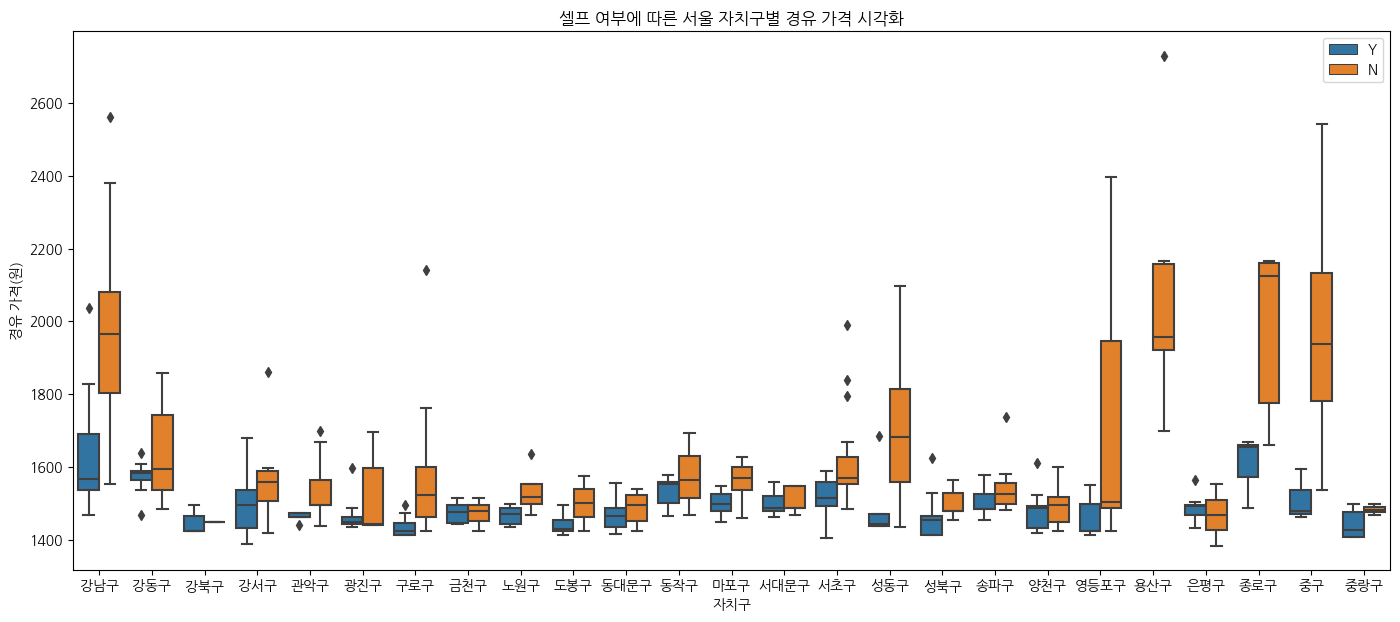

In [111]:
from scipy.stats import levene, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# 셀프 여부에 따른 경유 가격 시각화
plt.figure(figsize = (17,7))
sns.boxplot(x='gu_names', y='diesel_price', data = gas_stations_df, hue = 'self_yn')
plt.title('셀프 여부에 따른 서울 자치구별 경유 가격 시각화')
plt.xlabel('자치구')
plt.ylabel('경유 가격(원)')
plt.legend()
plt.show()

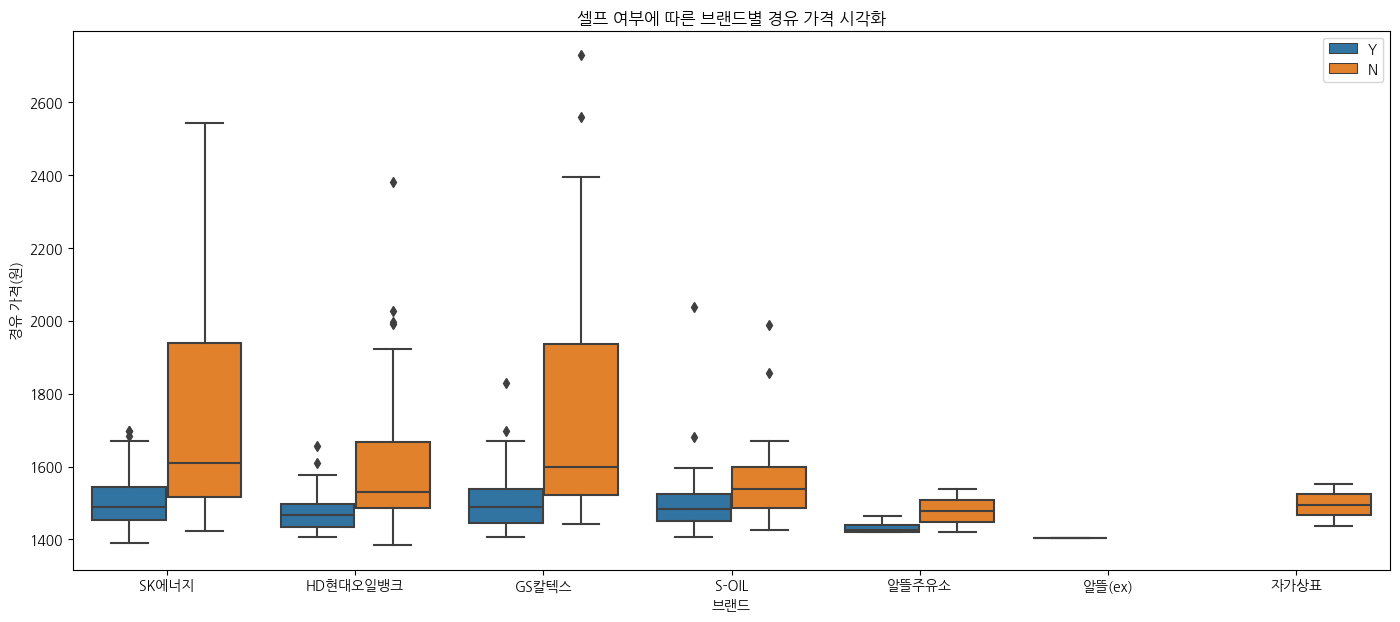

In [112]:
plt.figure(figsize = (17,7))
sns.boxplot(x='station_brand', y='diesel_price', data = gas_stations_df, hue = 'self_yn')
plt.title('셀프 여부에 따른 브랜드별 경유 가격 시각화')
plt.xlabel('브랜드')
plt.ylabel('경유 가격(원)')
plt.legend()
plt.show()

### 2.2.5 folium을 사용하여 셀프 여부에 따라 경유 가격 시각화 해보기
#### 초록색 원과 아이콘은 셀프주유소 빨간색 원과 아이콘은 셀프 아닌 곳들
#### Circle Marker의 radius 값에 경유 가격을 곱하여서 원의 크기가 가격을 표시할 수 있도록 시각화 하였다
#### 지도를 확대해서 보면 대체로 초록색(셀프주유소)들이 빨간색(셀프 아닌 주유소들)보다 원의 크기가 작음이 보인다

In [113]:
import folium
#서울 중심부의 위치
map_center = [37.5665, 126.9780]

# 지도 객체 생성
m_diesel = folium.Map(location=map_center, zoom_start=11)

# 데이터프레임을 반복하면서 마커와 팝업을 추가
for idx, row in gas_stations_df.iterrows():
    # 셀프 여부에 따라 색상을 다르게 설정
    if row['self_yn'] == 'Y':
        icon_color = 'green'
    else:
        icon_color = 'red'
    
    # 마커 생성
    marker = folium.Marker(
        location= [row['lat'], row['lng']],
        popup = '{}원'.format(row['diesel_price']),
        icon = folium.Icon(color=icon_color),
        tooltip = row['station_name']
    )
    circle_marker = folium.Circle(
        location= [row['lat'], row['lng']],
        radius = row['diesel_price'] * 0.3,
        fill_color = 'green' if row['self_yn'] == 'Y' else 'red',
        line_color = 'green' if row['self_yn'] == 'Y' else 'red',
        tooltip = '{}원'.format(row['diesel_price']))
        
    # 생성된 마커를 지도에 추가
    marker.add_to(m_diesel)
    circle_marker.add_to(m_diesel)

In [114]:
m_diesel

# 문제 2번 최종결론:
## 휘발유 및 경유 가격에 대해 통계적 검정, 지도 시각화, 박스플랏, qq-plot 시각화 등의 해석에 대해 위에 길게 기록해 놓은 것들을 종합해보자
## QQ-plot 및 Mann-Whitney 검정, (셀프 여부와 경유, 휘발유에 따른 folium 지도 시각화) 및 자치구별, 브랜드별 셀프여부에 따른 박스플랏의 해석결과를 보면 휘발유, 경유에 대하여 셀프주유소의 가격이 일반 주유소보다 저렴하다는 결론을 내릴 수 있다